In [1]:
#importing necessary libraries
import numpy as np
import utils
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from sklearn.metrics import mean_squared_error
import random

In [2]:
def START_seed():
    seed = 9
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# Prediction of Plant X Yields:
## -------------------------------------------------------------------------

### Data Loading and Preprocessing

In [3]:
# Uploading data and observing basic information
df_x = pd.read_excel('plants_data.xlsx', sheet_name='Plant X', usecols='A:L', skiprows=1, nrows=1239)

df_x.drop(index=df_x.index[0], inplace=True)
df_x.drop(columns=['Date'], inplace=True)

rows, cols = df_x.shape
reaction_rates = [col for col in df_x.columns if " RR" in col]

print("Number of Columns:", cols, ", Number of Rows:", rows)
df_x.head()

Number of Columns: 11 , Number of Rows: 1236


,Feed B,Feed S,Feed i,C1 RR,C1,NGL RR,NGL,Condensate RR,Condensate,Sulphur RR,Sulphur
1,99,407,106.0,1.0,645,1.0,2965,1.0,15090,1.0,1390
2,167,336,113.0,1.0,632,1.0,3316,1.0,15541,1.0,1377
3,176,418,118.0,1.0,640,1.0,3367,1.0,14088,1.0,1384
4,182,398,142.0,1.0,633,1.0,3500,1.0,10628,1.0,1328
5,186,455,142.0,1.0,622,1.0,3410,1.0,9631,1.0,1299


In [4]:
# Give assumption of fully optimized outputs
for rate in reaction_rates:
    df_x[rate[:-3]] = df_x[rate[:-3]] / df_x[rate]

In [5]:
# data pre-processing
cols = list(set(df_x.columns) - set(reaction_rates))
df = df_x.copy()

df = utils.rm_zeros(df, cols)
df = utils.rm_outliers(df, n_neighbors=10, contamination=0.05)

df = df[cols] * 1.0

for i in cols:
    df[i] = pd.to_numeric(df[i], errors='coerce')
# NOTE: removeing outliers 1: only for output, 2: increase range

In [6]:
df.to_excel('processed_x.xlsx', index=False)

In [7]:
df.head()

,C1,NGL,Sulphur,Feed B,Feed S,Condensate,Feed i
1,645.0,2965.0,1390.0,99.0,407.0,15090.0,106.0
2,632.0,3316.0,1377.0,167.0,336.0,15541.0,113.0
3,640.0,3367.0,1384.0,176.0,418.0,14088.0,118.0
4,633.0,3500.0,1328.0,182.0,398.0,10628.0,142.0
5,622.0,3410.0,1299.0,186.0,455.0,9631.0,142.0


In [8]:
#evaluate different models on different with regard to differnet outcome
cols = ['Feed B', 'Feed S', 'Feed i']
C1_models , C1_results = utils.evaluate_models(df,['C1'], cols)
NGL_models , NGL_results = utils.evaluate_models(df,['NGL'], cols)
Condensate_models , Condensate_results = utils.evaluate_models(df,['Condensate'], cols)
Sulphur_models , Sulphur_results = utils.evaluate_models(df,['Sulphur'],cols)

===================== Results for =====================
['C1']
                          R2 Score          MSE       RMSE        MAE  \
Linear Regression         0.252319  2055.686968  45.339684  29.540222   
Decision Tree            -0.329903  3656.457711  60.468651  26.039801   
Random Forest             0.401512  1645.493792  40.564687  19.240100   
Support Vector Regressor  0.027026  2675.111101  51.721476  20.413380   

                               MAP  
Linear Regression         0.945723  
Decision Tree             0.951039  
Random Forest             0.965358  
Support Vector Regressor  0.955456   

===================== Results for =====================
['NGL']
                          R2 Score            MSE        RMSE         MAE  \
Linear Regression         0.334751  396248.921421  629.483059  556.459230   
Decision Tree             0.065299  556744.756388  746.153306  515.324252   
Random Forest             0.401032  356769.113923  597.301527  464.697236   
Support Vect

In [9]:
cols = ['Feed i', 'Feed S']
Condensate_models_reqFeed , Condensate_results_reqFeed = utils.evaluate_models(df,['Condensate'], cols)

cols = ['Feed i', 'Feed S']
Sulphur_models_reqFeed , Sulphur_results_reqFeed = utils.evaluate_models(df,['Sulphur'],cols)

===================== Results for =====================
['Condensate']
                          R2 Score           MSE         RMSE          MAE  \
Linear Regression         0.105371  1.038846e+07  3223.112983  2695.522513   
Decision Tree            -1.050064  2.380541e+07  4879.078403  3796.870647   
Random Forest            -0.032224  1.198621e+07  3462.111057  2711.034803   
Support Vector Regressor  0.000892  1.160168e+07  3406.123366  2819.143542   

                               MAP  
Linear Regression         0.828566  
Decision Tree             0.759694  
Random Forest             0.826209  
Support Vector Regressor  0.817822   

===================== Results for =====================
['Sulphur']
                          R2 Score           MSE        RMSE         MAE  \
Linear Regression         0.234746  15414.994511  124.157136   88.422713   
Decision Tree            -0.486248  29938.426617  173.027242  116.723881   
Random Forest             0.149737  17127.386423  130.8

In [10]:
features = ['Feed B', 'Feed i', 'Feed S']
targets = ['C1','NGL', 'Condensate', 'Sulphur']
all_models , all_results = utils.evaluate_models(df,targets,features)

===================== Results for =====================
['C1', 'NGL', 'Condensate', 'Sulphur']
                          R2 Score           MSE         RMSE         MAE  \
Linear Regression         0.257110  2.680740e+06  1637.296547  838.231553   
Decision Tree            -0.276239  5.079727e+06  2253.825013  978.153637   
Random Forest             0.374760  2.461268e+06  1568.842773  725.665236   
Support Vector Regressor  0.026689  3.065391e+06  1750.825711  878.200152   

                               MAP  
Linear Regression         0.889622  
Decision Tree             0.882085  
Random Forest             0.908735  
Support Vector Regressor  0.887111   



In [11]:
features = ['Feed B', 'Feed i', 'Feed S']
targets = ['C1','NGL', 'Sulphur']
all_models_no_cond , all_results_no_cond = utils.evaluate_models(df,targets,features)

===================== Results for =====================
['C1', 'NGL', 'Sulphur']
                          R2 Score            MSE        RMSE         MAE  \
Linear Regression         0.305470  137271.371544  370.501514  223.274638   
Decision Tree            -0.044417  187735.083498  433.284068  210.637711   
Random Forest             0.431440  123520.696212  351.455113  186.047692   
Support Vector Regressor  0.035506  217435.275535  466.299556  230.922866   

                               MAP  
Linear Regression         0.909814  
Decision Tree             0.913743  
Random Forest             0.928519  
Support Vector Regressor  0.910229   



In [12]:
coefficients, biases = utils.parameter_extractor(all_models_no_cond['Linear Regression'],['C1','NGL', 'Sulphur'])

LinearRegression()
LinearRegression()
LinearRegression()


### Prediction with Neural Network


Fold 1/5
Epoch [100/1000], Training Loss: 68565864.0000, Validation Loss: 70157072.0000, MAPE: 19.37%, R²: -0.5869
Epoch [200/1000], Training Loss: 46064580.0000, Validation Loss: 46930472.0000, MAPE: 65.36%, R²: -0.0615
Epoch [300/1000], Training Loss: 15163823.0000, Validation Loss: 15217028.0000, MAPE: 77.53%, R²: 0.6558
Epoch [400/1000], Training Loss: 3953282.7500, Validation Loss: 3685241.2500, MAPE: 85.69%, R²: 0.9166
Epoch [500/1000], Training Loss: 3597572.7500, Validation Loss: 3260769.5000, MAPE: 85.91%, R²: 0.9262
Epoch [600/1000], Training Loss: 3581498.7500, Validation Loss: 3235670.0000, MAPE: 85.92%, R²: 0.9268
Epoch [700/1000], Training Loss: 3567055.5000, Validation Loss: 3214773.7500, MAPE: 85.93%, R²: 0.9273
Epoch [800/1000], Training Loss: 3554140.2500, Validation Loss: 3195440.0000, MAPE: 85.94%, R²: 0.9277
Epoch [900/1000], Training Loss: 3542921.0000, Validation Loss: 3177940.7500, MAPE: 85.94%, R²: 0.9281
Epoch [1000/1000], Training Loss: 3533432.2500, Validat

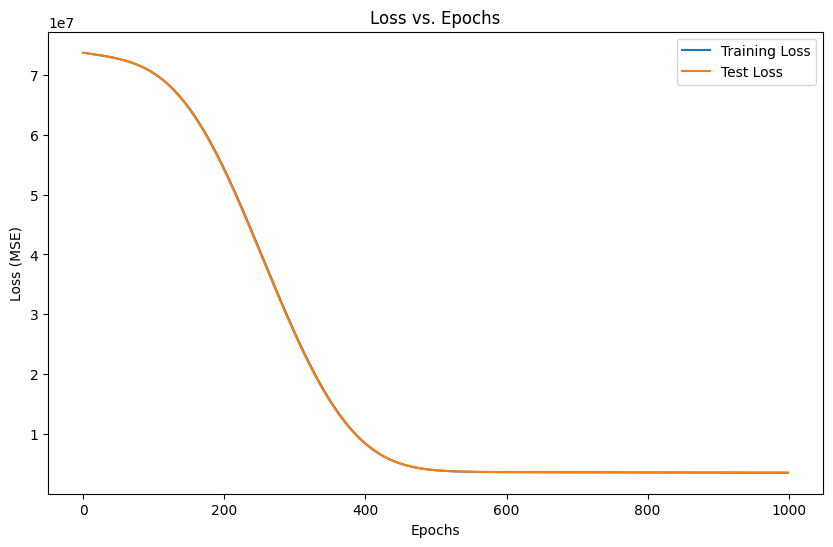

In [13]:
# NOTE: weight of internsically higherr value feed on loss, try normalization
input = [ 'Feed B','Feed S', 'Feed i']
output = ['NGL', 'C1', 'Condensate', 'Sulphur']
hidden_sizes = [12,12]

fnn, criterion, optimizer = utils.makeNN(input, output, hidden_sizes, df)
models, fold_results, trainLoss, valLoss = utils.trainKfolds(fnn, criterion, optimizer, epochs=1000, n_splits=5)
utils.loss_plot(trainLoss, valLoss)


Fold 1/5
Epoch [100/1000], Training Loss: 4954366.0000, Validation Loss: 5047627.0000, MAPE: 11.39%, R²: -1.3681
Epoch [200/1000], Training Loss: 2077180.3750, Validation Loss: 2095691.1250, MAPE: 61.62%, R²: 0.0168
Epoch [300/1000], Training Loss: 303024.3125, Validation Loss: 308194.0312, MAPE: 85.39%, R²: 0.8554
Epoch [400/1000], Training Loss: 208403.6719, Validation Loss: 214189.5469, MAPE: 88.14%, R²: 0.8995
Epoch [500/1000], Training Loss: 197969.7500, Validation Loss: 202716.7344, MAPE: 88.20%, R²: 0.9049
Epoch [600/1000], Training Loss: 189507.9062, Validation Loss: 193229.6406, MAPE: 88.19%, R²: 0.9093
Epoch [700/1000], Training Loss: 182917.6719, Validation Loss: 185655.5938, MAPE: 88.08%, R²: 0.9129
Epoch [800/1000], Training Loss: 177970.8750, Validation Loss: 179796.5156, MAPE: 87.93%, R²: 0.9157
Epoch [900/1000], Training Loss: 174378.3438, Validation Loss: 175382.0000, MAPE: 87.76%, R²: 0.9177
Epoch [1000/1000], Training Loss: 171842.3438, Validation Loss: 172122.7656,

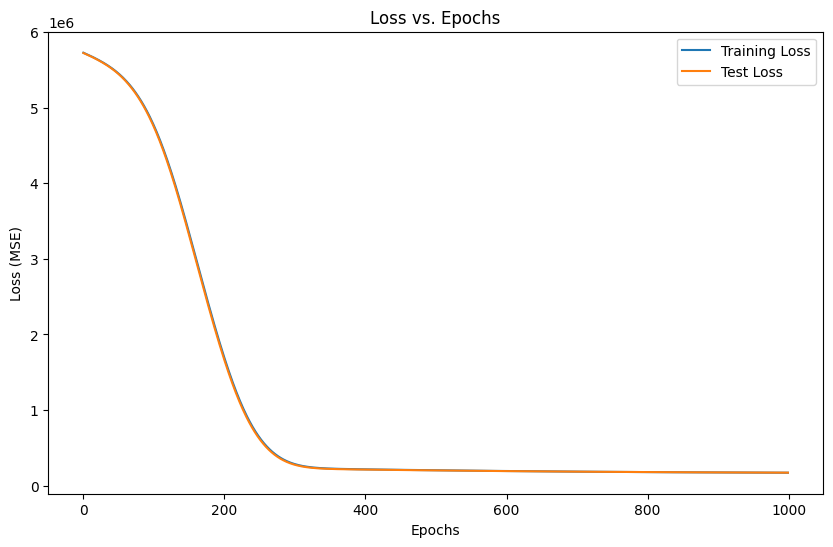

In [14]:
input = [ 'Feed B','Feed S', 'Feed i']
output = ['NGL', 'C1', 'Sulphur']
hidden_sizes = [12,12]

fnn, criterion, optimizer = utils.makeNN(input, output, hidden_sizes, df)
models, fold_results, trainLoss, valLoss = utils.trainKfolds(fnn, criterion, optimizer, epochs=1000, n_splits=5)
utils.loss_plot(trainLoss, valLoss)


Fold 1/5
Epoch [100/1000], Training Loss: 2885102.5000, Validation Loss: 2924522.5000, MAPE: 66.64%, R²: -0.3720
Epoch [200/1000], Training Loss: 251711.4375, Validation Loss: 264671.6250, MAPE: 88.42%, R²: 0.8758
Epoch [300/1000], Training Loss: 186887.5000, Validation Loss: 201375.7812, MAPE: 89.47%, R²: 0.9055
Epoch [400/1000], Training Loss: 184682.8281, Validation Loss: 198898.1094, MAPE: 89.51%, R²: 0.9067
Epoch [500/1000], Training Loss: 182235.8438, Validation Loss: 196130.1875, MAPE: 89.56%, R²: 0.9080
Epoch [600/1000], Training Loss: 179594.0938, Validation Loss: 193129.2031, MAPE: 89.61%, R²: 0.9094
Epoch [700/1000], Training Loss: 176797.6406, Validation Loss: 189937.1094, MAPE: 89.66%, R²: 0.9109
Epoch [800/1000], Training Loss: 173883.4062, Validation Loss: 186592.5781, MAPE: 89.71%, R²: 0.9125
Epoch [900/1000], Training Loss: 170888.2812, Validation Loss: 183134.0625, MAPE: 89.75%, R²: 0.9141
Epoch [1000/1000], Training Loss: 167851.0938, Validation Loss: 179602.5156, M

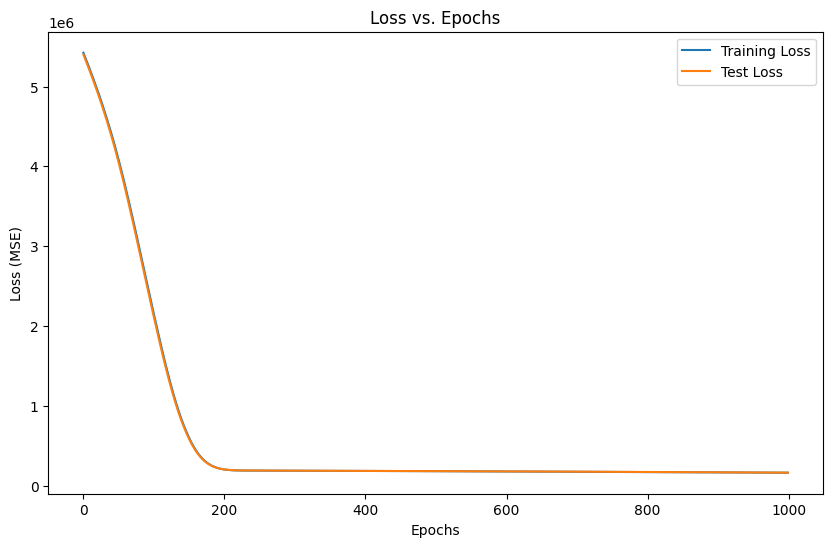

In [15]:
input = [ 'Feed B','Feed S', 'Feed i']
output = ['NGL', 'C1', 'Sulphur']
hidden_sizes = [3,9,12]

fnn, criterion, optimizer = utils.makeNN(input, output, hidden_sizes, df,coefficients = coefficients, biases= biases)

models, fold_results, trainLoss, valLoss = utils.trainKfolds(fnn, criterion, optimizer, epochs=1000, n_splits=5)
utils.loss_plot(trainLoss, valLoss)

In [16]:
input = [ 'Feed B','Feed S', 'Feed i']
output = ['NGL', 'C1', 'Condensate', 'Sulphur']

Dlosses_train = []
Dlosses_test = []
for d in np.arange(2, 20):    
    hidden_sizes = np.full(d, 4)

    fnn, criterion, optimizer = utils.makeNN(input, output, hidden_sizes,df)
    models, fold_results, trainLoss, valLoss = utils.trainKfolds(fnn, criterion, optimizer, epochs=600, n_splits=5, printOut=0)

    Dlosses_train.append(np.mean(trainLoss[-10:]))
    Dlosses_test.append(np.mean(valLoss[-10:])) 

Wlosses_train = []
Wlosses_test = []
for w in np.arange(2, 20):    
    hidden_sizes = np.full(4, w)

    fnn, criterion, optimizer = utils.makeNN(input, output, hidden_sizes,df)
    models, fold_results, trainLoss, valLoss = utils.trainKfolds(fnn, criterion, optimizer, epochs=600, n_splits=5, printOut=0)

    Wlosses_train.append(np.mean(trainLoss[-10:]))
    Wlosses_test.append(np.mean(valLoss[-10:]))


Fold 1/5
Fold 1 Validation Loss: 26470612.0000, MAPE: 75.61%, R²: 0.4013

Fold 2/5
Fold 2 Validation Loss: 29650444.0000, MAPE: 72.31%, R²: 0.3120

Fold 3/5
Fold 3 Validation Loss: 10764853.0000, MAPE: 79.96%, R²: 0.7390

Fold 4/5
Fold 4 Validation Loss: 19811200.0000, MAPE: 77.26%, R²: 0.5412

Fold 5/5
Fold 5 Validation Loss: 34441688.0000, MAPE: 69.86%, R²: 0.2312

Average Validation Loss: 24227759.4000, Average MAPE: 75.00%, Average R²: 0.4449

Fold 1/5
Fold 1 Validation Loss: 7469936.5000, MAPE: 68.58%, R²: 0.8310

Fold 2/5
Fold 2 Validation Loss: 4802383.5000, MAPE: 84.59%, R²: 0.8886

Fold 3/5
Fold 3 Validation Loss: 3485121.2500, MAPE: 84.28%, R²: 0.9155

Fold 4/5
Fold 4 Validation Loss: 3942378.2500, MAPE: 85.44%, R²: 0.9087

Fold 5/5
Fold 5 Validation Loss: 3788623.0000, MAPE: 83.66%, R²: 0.9154

Average Validation Loss: 4697688.5000, Average MAPE: 81.31%, Average R²: 0.8919

Fold 1/5
Fold 1 Validation Loss: 3771959.7500, MAPE: 84.60%, R²: 0.9147

Fold 2/5
Fold 2 Validation L

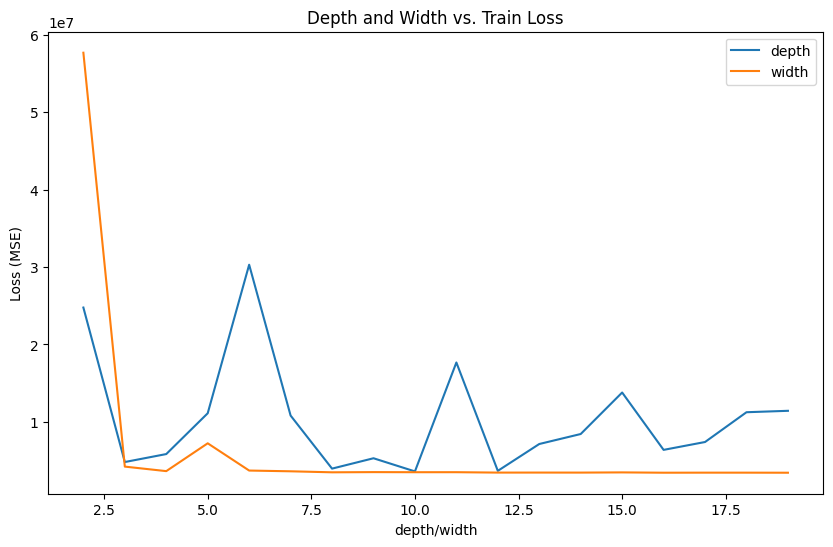

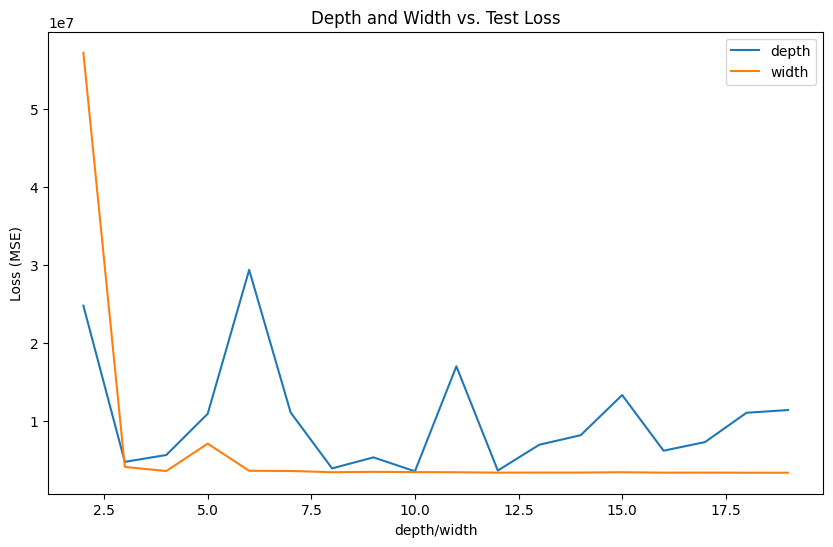

In [17]:
start = 0
plt.figure(figsize=(10, 6))
plt.plot(range(2+start,20), Dlosses_train[start:], label='depth')
plt.plot(range(2+start,20), Wlosses_train[start:], label='width')
plt.xlabel('depth/width')
plt.ylabel('Loss (MSE)')
plt.title('Depth and Width vs. Train Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(range(2+start,20), Dlosses_test[start:], label='depth')
plt.plot(range(2+start,20), Wlosses_test[start:], label='width')
plt.xlabel('depth/width')
plt.ylabel('Loss (MSE)')
plt.title('Depth and Width vs. Test Loss')
plt.legend()
plt.show()


Fold 1/5
Epoch [100/1000], Training Loss: 72899032.0000, Validation Loss: 74673864.0000, MAPE: 0.54%, R²: -0.6890
Epoch [200/1000], Training Loss: 64375688.0000, Validation Loss: 65736464.0000, MAPE: 32.84%, R²: -0.4869
Epoch [300/1000], Training Loss: 23002980.0000, Validation Loss: 22996742.0000, MAPE: 13.39%, R²: 0.4798
Epoch [400/1000], Training Loss: 4924365.5000, Validation Loss: 4665487.5000, MAPE: 53.63%, R²: 0.8945
Epoch [500/1000], Training Loss: 3892867.0000, Validation Loss: 3600942.7500, MAPE: 80.80%, R²: 0.9186
Epoch [600/1000], Training Loss: 3753003.2500, Validation Loss: 3442267.0000, MAPE: 85.62%, R²: 0.9221
Epoch [700/1000], Training Loss: 3677972.0000, Validation Loss: 3351848.7500, MAPE: 86.05%, R²: 0.9242
Epoch [800/1000], Training Loss: 3624385.2500, Validation Loss: 3284841.0000, MAPE: 86.12%, R²: 0.9257
Epoch [900/1000], Training Loss: 3585425.7500, Validation Loss: 3233996.5000, MAPE: 86.14%, R²: 0.9269
Epoch [1000/1000], Training Loss: 3557214.2500, Validati

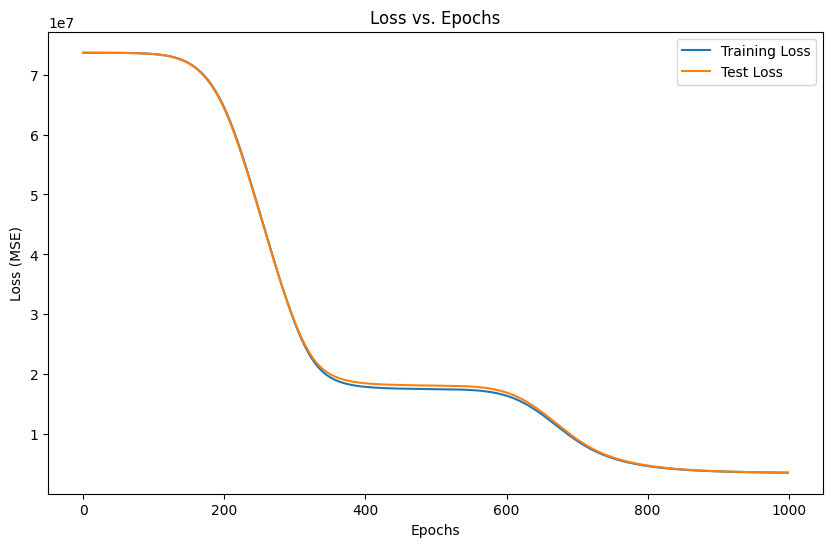

In [18]:
input = [ 'Feed B','Feed S', 'Feed i']
output = ['NGL', 'C1', 'Condensate', 'Sulphur']
hidden_sizes = np.full(5, 5)

fnn, criterion, optimizer = utils.makeNN(input, output, hidden_sizes,df)
models, fold_results, trainLoss, valLoss = utils.trainKfolds(fnn, criterion, optimizer, epochs=1000, n_splits=5)

utils.loss_plot(trainLoss, valLoss)

# Plant Y:
## -------------------------------------------------------------------------

In [19]:
# Uploading data and observing basic information
df_y = pd.read_excel('plants_data.xlsx', sheet_name='Plant Y', usecols='A:M', skiprows=1, nrows=1239)

df_y.drop(index=df_y.index[0], inplace=True)
df_y.drop(columns=['Date'], inplace=True)

rows, cols = df_y.shape
reaction_rates = [col for col in df_y.columns if " RR" in col]

print("Number of Columns:", cols, ", Number of Rows:", rows)
df_y.head()

Number of Columns: 12 , Number of Rows: 1236


,Feed B,Feed S,Feed k,Feed i,Feed O,Feed N,C1 RR,C1,NGL RR,NGL,Sulphur RR,Sulphur
1,299,178,73,797,139,114,1.0,1211,0.95,9494,1.0,2658
2,299,183,69,758,139,134,1.0,1202,0.95,9687,1.0,2395
3,299,184,86,769,179,115,1.0,1198,0.95,9742,1.0,2344
4,299,186,69,749,199,117,1.0,1191,0.95,10048,1.0,2409
5,299,185,76,667,197,122,1.0,1185,0.95,10053,1.0,2311


In [20]:
# Give assumption of fully optimized outputs
for rate in reaction_rates:
    df_y[rate[:-3]] = df_y[rate[:-3]] / df_y[rate]

In [21]:
# data pre-processing
cols = list(set(df_y.columns) - set(reaction_rates))
df = df_y.copy()

df = utils.rm_zeros(df, cols)
df = utils.rm_outliers(df, n_neighbors=10, contamination=0.05)

df = df[cols] * 1.0

for i in cols:
    df[i] = pd.to_numeric(df[i], errors='coerce')
# NOTE: removeing outliers 1: only for output, 2: increase range

In [22]:
df.to_excel('processed_y.xlsx', index=False)

In [23]:
df.head()

,C1,NGL,Feed O,Sulphur,Feed B,Feed S,Feed k,Feed N,Feed i
1,1211.0,9993.684211,139.0,2658.0,299.0,178.0,73.0,114.0,797.0
2,1202.0,10196.842105,139.0,2395.0,299.0,183.0,69.0,134.0,758.0
3,1198.0,10254.736842,179.0,2344.0,299.0,184.0,86.0,115.0,769.0
4,1191.0,10576.842105,199.0,2409.0,299.0,186.0,69.0,117.0,749.0
5,1185.0,10582.105263,197.0,2311.0,299.0,185.0,76.0,122.0,667.0


In [24]:
cols = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
C1_models_y , C1_results_y = utils.evaluate_models(df,['C1'], cols)
NGL_models_y , NGL_results_y = utils.evaluate_models(df,['NGL'], cols)

cols = ['Feed B', 'Feed S','Feed i','Feed O ', 'Feed N']
Sulphur_models_y , Sulphur_results_y = utils.evaluate_models(df,['Sulphur'],cols)

===================== Results for =====================
['C1']
                          R2 Score          MSE       RMSE        MAE  \
Linear Regression         0.241330  6713.834163  81.937990  53.143880   
Decision Tree             0.397589  5331.023392  73.013858  39.163743   
Random Forest             0.547871  4001.106976  63.254304  32.738421   
Support Vector Regressor  0.114696  7834.483720  88.512619  53.508432   

                               MAP  
Linear Regression         0.945459  
Decision Tree             0.959651  
Random Forest             0.965218  
Support Vector Regressor  0.943918   

===================== Results for =====================
['NGL']
                          R2 Score           MSE         RMSE          MAE  \
Linear Regression         0.547594  1.010900e+06  1005.435290   682.437121   
Decision Tree             0.597280  8.998779e+05   948.618935   584.770699   
Random Forest             0.758616  5.393728e+05   734.420068   441.656941   
Support 

In [25]:
cols = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
out = ['C1', 'NGL', 'Sulphur']
all_models_y , all_results_y = utils.evaluate_models(df,out,cols)

===================== Results for =====================
['C1', 'NGL', 'Sulphur']
                          R2 Score            MSE        RMSE         MAE  \
Linear Regression         0.402799  377322.393320  614.265735  331.390547   
Decision Tree             0.349606  403306.970641  635.064541  312.290756   
Random Forest             0.602118  221685.640599  470.835046  230.261865   
Support Vector Regressor  0.061735  830995.837160  911.589731  486.458536   

                               MAP  
Linear Regression         0.911435  
Decision Tree             0.910644  
Random Forest             0.931500  
Support Vector Regressor  0.883715   




Fold 1/5
Epoch [200/2000], Training Loss: 6292089.5000, Validation Loss: 6177532.5000, MAPE: 76.05%, R²: 0.7657
Epoch [400/2000], Training Loss: 781190.5625, Validation Loss: 997905.1250, MAPE: 86.12%, R²: 0.9621
Epoch [600/2000], Training Loss: 652539.5625, Validation Loss: 834908.5000, MAPE: 86.32%, R²: 0.9683
Epoch [800/2000], Training Loss: 557836.2500, Validation Loss: 711459.1875, MAPE: 86.43%, R²: 0.9730
Epoch [1000/2000], Training Loss: 495370.5938, Validation Loss: 627391.8125, MAPE: 86.51%, R²: 0.9762
Epoch [1200/2000], Training Loss: 455387.6250, Validation Loss: 572699.8750, MAPE: 86.65%, R²: 0.9783
Epoch [1400/2000], Training Loss: 419020.3438, Validation Loss: 518661.0000, MAPE: 87.16%, R²: 0.9803
Epoch [1600/2000], Training Loss: 358107.2812, Validation Loss: 446879.0312, MAPE: 88.12%, R²: 0.9831
Epoch [1800/2000], Training Loss: 329572.1562, Validation Loss: 423886.0312, MAPE: 88.11%, R²: 0.9839
Epoch [2000/2000], Training Loss: 321032.9688, Validation Loss: 412775.656

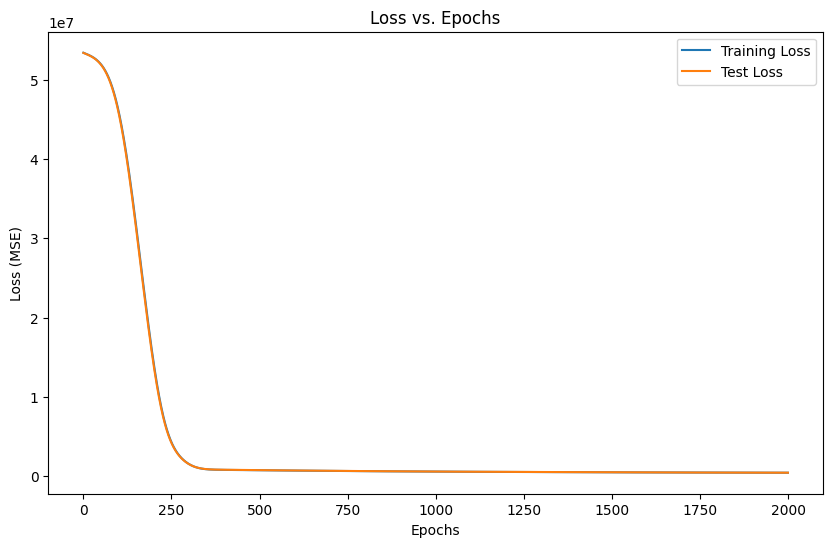

In [26]:
# NOTE: 2^x might be a good idea to set width at (CNN)
# NOTE: change mape top map
input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['C1', 'NGL', 'Sulphur']
hidden_sizes = [16,16]

fnn_y, criterion, optimizer = utils.makeNN(input, output, hidden_sizes,df)
models, fold_results, trainLoss, valLoss = utils.trainKfolds(fnn_y, criterion, optimizer, epochs=2000, n_splits=5)

utils.loss_plot(trainLoss, valLoss)

In [27]:
coefficients_y, biases_y = utils.parameter_extractor(all_models_y['Linear Regression'],['C1','NGL', 'Sulphur'])

LinearRegression()
LinearRegression()
LinearRegression()



Fold 1/5
Epoch [200/2000], Training Loss: 318221.4375, Validation Loss: 442946.2500, MAPE: 86.49%, R²: 0.9832
Epoch [400/2000], Training Loss: 317547.2812, Validation Loss: 441408.6875, MAPE: 86.52%, R²: 0.9833
Epoch [600/2000], Training Loss: 316766.3125, Validation Loss: 440543.1875, MAPE: 86.58%, R²: 0.9833
Epoch [800/2000], Training Loss: 313733.3750, Validation Loss: 437185.4062, MAPE: 86.77%, R²: 0.9834
Epoch [1000/2000], Training Loss: 296141.8125, Validation Loss: 416551.0000, MAPE: 87.73%, R²: 0.9842
Epoch [1200/2000], Training Loss: 284499.8125, Validation Loss: 401853.3750, MAPE: 88.72%, R²: 0.9848
Epoch [1400/2000], Training Loss: 275772.3125, Validation Loss: 389135.5312, MAPE: 89.93%, R²: 0.9852
Epoch [1600/2000], Training Loss: 272409.4375, Validation Loss: 382369.9062, MAPE: 90.55%, R²: 0.9855
Epoch [1800/2000], Training Loss: 271663.6875, Validation Loss: 379730.3125, MAPE: 90.67%, R²: 0.9856
Epoch [2000/2000], Training Loss: 271541.9062, Validation Loss: 378806.5938,

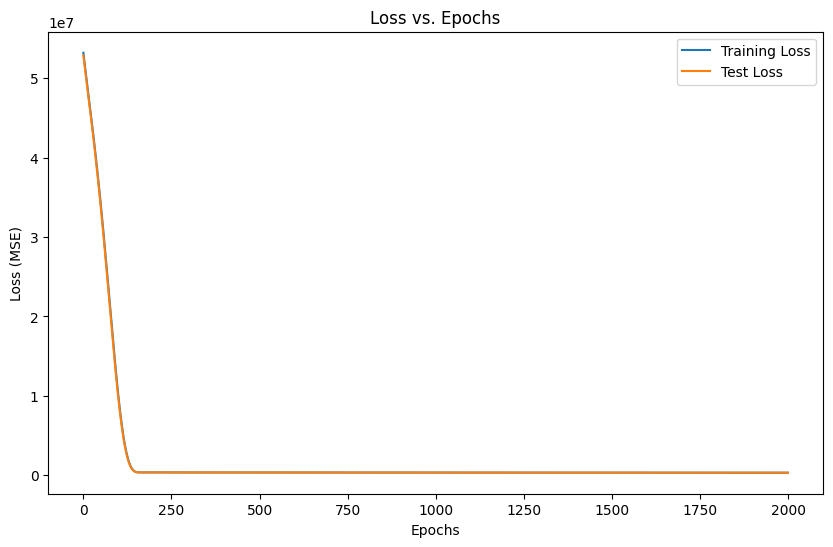

In [28]:
input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['C1', 'NGL', 'Sulphur']
hidden_sizes = [3,16,16]

fnn_y, criterion, optimizer = utils.makeNN(input, output, hidden_sizes,df,coefficients=coefficients_y , biases=biases_y)
models_s, fold_results_s, trainLoss_S, valLoss_S = utils.trainKfolds(fnn_y, criterion, optimizer, epochs=2000, n_splits=5)

utils.loss_plot(trainLoss_S, valLoss_S)


Fold 1/5
Epoch [200/2000], Training Loss: 719114.8125, Validation Loss: 925372.0625, MAPE: 85.50%, R²: 0.9649
Epoch [400/2000], Training Loss: 592813.1875, Validation Loss: 749546.7500, MAPE: 85.59%, R²: 0.9716
Epoch [600/2000], Training Loss: 527075.0000, Validation Loss: 659830.8750, MAPE: 85.62%, R²: 0.9750
Epoch [800/2000], Training Loss: 487200.9062, Validation Loss: 606081.2500, MAPE: 85.66%, R²: 0.9770
Epoch [1000/2000], Training Loss: 459703.5625, Validation Loss: 572462.8750, MAPE: 85.77%, R²: 0.9783
Epoch [1200/2000], Training Loss: 437795.5938, Validation Loss: 548886.6250, MAPE: 85.91%, R²: 0.9792
Epoch [1400/2000], Training Loss: 419558.5000, Validation Loss: 530883.5000, MAPE: 86.04%, R²: 0.9799
Epoch [1600/2000], Training Loss: 404478.0625, Validation Loss: 516473.8750, MAPE: 86.16%, R²: 0.9804
Epoch [1800/2000], Training Loss: 392151.0625, Validation Loss: 504560.2500, MAPE: 86.27%, R²: 0.9809
Epoch [2000/2000], Training Loss: 382119.9688, Validation Loss: 494406.6875,

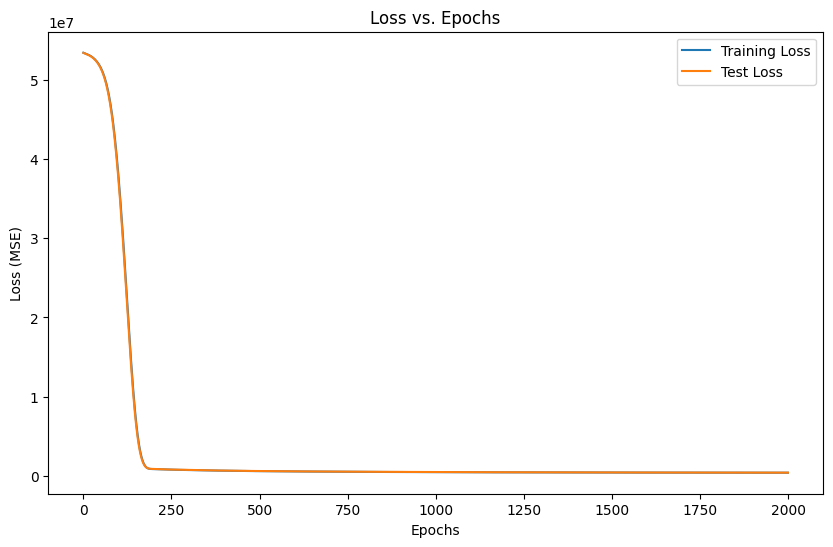

In [29]:
input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['C1', 'NGL', 'Sulphur']
hidden_sizes = [16,16,16]

fnn_y, criterion, optimizer = utils.makeNN(input, output, hidden_sizes,df)
models_c, fold_results_c, trainLoss_c, valLoss_c = utils.trainKfolds(fnn_y, criterion, optimizer, epochs=2000, n_splits=5)

utils.loss_plot(trainLoss_c, valLoss_c)


Fold 1/5
Epoch [200/2000], Training Loss: 40676540.0000, Validation Loss: 40535024.0000, MAPE: 47.23%, R²: -0.5375
Epoch [400/2000], Training Loss: 17422460.0000, Validation Loss: 17340808.0000, MAPE: 69.15%, R²: 0.3423
Epoch [600/2000], Training Loss: 3690617.2500, Validation Loss: 3772525.7500, MAPE: 81.69%, R²: 0.8569
Epoch [800/2000], Training Loss: 958708.9375, Validation Loss: 1156660.1250, MAPE: 85.85%, R²: 0.9561
Epoch [1000/2000], Training Loss: 796518.3125, Validation Loss: 1014044.3750, MAPE: 86.13%, R²: 0.9615
Epoch [1200/2000], Training Loss: 757208.7500, Validation Loss: 968262.3750, MAPE: 86.32%, R²: 0.9633
Epoch [1400/2000], Training Loss: 719117.2500, Validation Loss: 920312.3750, MAPE: 86.55%, R²: 0.9651
Epoch [1600/2000], Training Loss: 681303.7500, Validation Loss: 872151.6875, MAPE: 86.79%, R²: 0.9669
Epoch [1800/2000], Training Loss: 644110.8750, Validation Loss: 824388.1875, MAPE: 87.05%, R²: 0.9687
Epoch [2000/2000], Training Loss: 608086.6250, Validation Loss:

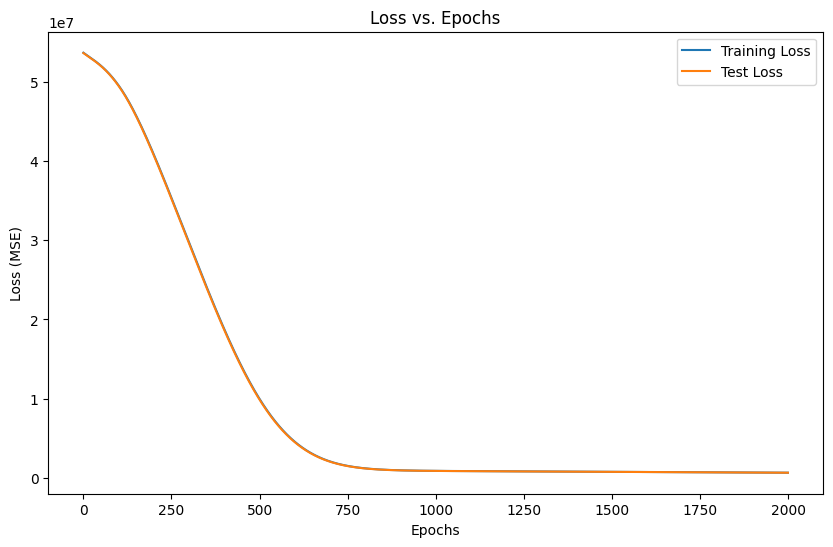

In [30]:
input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['C1', 'NGL', 'Sulphur']
hidden_sizes = [16]

fnn_y, criterion, optimizer = utils.makeNN(input, output, hidden_sizes, df)
models, fold_results, trainLoss, valLoss = utils.trainKfolds(fnn_y, criterion, optimizer, epochs=2000, n_splits=5)

utils.loss_plot(trainLoss, valLoss)

In [31]:
# NOTE: set the fraction at start maybe
df_y_train = df.sample(frac=0.8, random_state=7)
df_y_test = df.drop(df_y_train.index)

In [32]:
# TOBEREMOVED
# coefficients_C1, biases_C1 = parameter_extractor(C1_models_y['Linear Regression'],['C1'])
# coefficients_NGL, biases_NGL = parameter_extractor(NGL_models_y['Linear Regression'],['NGL'])
# coefficients_Sulphur, biases_Sulphur = parameter_extractor(Sulphur_models_y['Linear Regression'],['Sulphur'])

In [33]:
input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['C1']
hidden_sizes = [16,16]

fnn_y, criterion, optimizer = utils.makeNN(input, output, hidden_sizes,df_y_train)
models_C1, fold_results_C1, trainLoss_C1, valLoss_C1 = utils.trainKfolds(fnn_y, criterion, optimizer, epochs=2000, n_splits=5)


Fold 1/5
Epoch [200/2000], Training Loss: 24033.6562, Validation Loss: 19940.8613, MAPE: 88.86%, R²: -2.6339
Epoch [400/2000], Training Loss: 16053.9062, Validation Loss: 12624.3926, MAPE: 91.41%, R²: -1.3006
Epoch [600/2000], Training Loss: 11754.5137, Validation Loss: 8644.4033, MAPE: 93.49%, R²: -0.5753
Epoch [800/2000], Training Loss: 10467.0820, Validation Loss: 7778.9497, MAPE: 93.93%, R²: -0.4176
Epoch [1000/2000], Training Loss: 9821.4980, Validation Loss: 7369.6904, MAPE: 94.10%, R²: -0.3430
Epoch [1200/2000], Training Loss: 9312.4248, Validation Loss: 7030.6445, MAPE: 94.24%, R²: -0.2812
Epoch [1400/2000], Training Loss: 8874.9395, Validation Loss: 6692.0840, MAPE: 94.36%, R²: -0.2195
Epoch [1600/2000], Training Loss: 8513.9551, Validation Loss: 6412.6401, MAPE: 94.46%, R²: -0.1686
Epoch [1800/2000], Training Loss: 8174.8335, Validation Loss: 6179.1250, MAPE: 94.57%, R²: -0.1260
Epoch [2000/2000], Training Loss: 7859.6118, Validation Loss: 5908.7612, MAPE: 94.70%, R²: -0.076

In [34]:
input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['NGL']
hidden_sizes = [16,16]

fnn_y, criterion, optimizer = utils.makeNN(input, output, hidden_sizes,df_y_train)
models_NGL, fold_results_NGL, trainLoss_NGL, valLoss_NGL = utils.trainKfolds(fnn_y, criterion, optimizer, epochs=2000, n_splits=5)


Fold 1/5
Epoch [200/2000], Training Loss: 28014992.0000, Validation Loss: 27026234.0000, MAPE: 59.62%, R²: -15.1809
Epoch [400/2000], Training Loss: 2493833.7500, Validation Loss: 2202544.0000, MAPE: 89.89%, R²: -0.3187
Epoch [600/2000], Training Loss: 2132018.2500, Validation Loss: 1866387.2500, MAPE: 90.69%, R²: -0.1174
Epoch [800/2000], Training Loss: 1823966.0000, Validation Loss: 1573435.2500, MAPE: 91.50%, R²: 0.0580
Epoch [1000/2000], Training Loss: 1589484.7500, Validation Loss: 1342675.1250, MAPE: 92.19%, R²: 0.1961
Epoch [1200/2000], Training Loss: 1424895.5000, Validation Loss: 1172959.0000, MAPE: 92.74%, R²: 0.2977
Epoch [1400/2000], Training Loss: 1313753.6250, Validation Loss: 1051968.5000, MAPE: 93.17%, R²: 0.3702
Epoch [1600/2000], Training Loss: 1236891.5000, Validation Loss: 964484.3125, MAPE: 93.53%, R²: 0.4226
Epoch [1800/2000], Training Loss: 1179392.0000, Validation Loss: 898120.5625, MAPE: 93.83%, R²: 0.4623
Epoch [2000/2000], Training Loss: 1132675.2500, Valida

In [35]:
input = ['Feed B', 'Feed S','Feed i','Feed O ', 'Feed N']
output = ['Sulphur']
hidden_sizes = [16,16]

fnn_y, criterion, optimizer = utils.makeNN(input, output, hidden_sizes,df_y_train)
models_Sulphur, fold_result_Sulphur, trainLoss_Sulphur, valLoss_Sulphur = utils.trainKfolds(fnn_y, criterion, optimizer, epochs=2000, n_splits=5)


Fold 1/5
Epoch [200/2000], Training Loss: 183285.1875, Validation Loss: 155227.6719, MAPE: 85.78%, R²: 0.0004
Epoch [400/2000], Training Loss: 163200.7500, Validation Loss: 140370.8438, MAPE: 86.36%, R²: 0.0961
Epoch [600/2000], Training Loss: 146689.1094, Validation Loss: 129868.9375, MAPE: 86.74%, R²: 0.1637
Epoch [800/2000], Training Loss: 134464.2188, Validation Loss: 123842.3359, MAPE: 87.07%, R²: 0.2025
Epoch [1000/2000], Training Loss: 127076.5703, Validation Loss: 121932.2656, MAPE: 87.25%, R²: 0.2148
Epoch [1200/2000], Training Loss: 123980.9688, Validation Loss: 122687.1094, MAPE: 87.25%, R²: 0.2100
Epoch [1400/2000], Training Loss: 123091.5781, Validation Loss: 123969.3125, MAPE: 87.19%, R²: 0.2017
Epoch [1600/2000], Training Loss: 122894.5234, Validation Loss: 124793.8359, MAPE: 87.16%, R²: 0.1964
Epoch [1800/2000], Training Loss: 122844.1328, Validation Loss: 125178.3516, MAPE: 87.14%, R²: 0.1939
Epoch [2000/2000], Training Loss: 122810.5625, Validation Loss: 125322.3906,

In [36]:
input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['C1', 'NGL', 'Sulphur']
hidden_sizes = [16,16]

fnn_y, criterion, optimizer = utils.makeNN(input, output, hidden_sizes, df_y_train)
models_all, fold_results_all, trainLoss_all, valLoss_all = utils.trainKfolds(fnn_y, criterion, optimizer, epochs=2000, n_splits=5)


Fold 1/5
Epoch [200/2000], Training Loss: 13910311.0000, Validation Loss: 13409011.0000, MAPE: 69.25%, R²: 0.4828
Epoch [400/2000], Training Loss: 1019048.3750, Validation Loss: 909628.7500, MAPE: 87.87%, R²: 0.9649
Epoch [600/2000], Training Loss: 688137.0000, Validation Loss: 597002.1250, MAPE: 88.39%, R²: 0.9770
Epoch [800/2000], Training Loss: 502531.6875, Validation Loss: 407190.7812, MAPE: 88.61%, R²: 0.9843
Epoch [1000/2000], Training Loss: 435982.1875, Validation Loss: 332093.4688, MAPE: 88.88%, R²: 0.9872
Epoch [1200/2000], Training Loss: 406478.4062, Validation Loss: 298253.1250, MAPE: 89.14%, R²: 0.9885
Epoch [1400/2000], Training Loss: 389330.7500, Validation Loss: 279461.8750, MAPE: 89.39%, R²: 0.9892
Epoch [1600/2000], Training Loss: 379028.3125, Validation Loss: 268415.8750, MAPE: 89.63%, R²: 0.9896
Epoch [1800/2000], Training Loss: 371809.8438, Validation Loss: 260555.2500, MAPE: 89.88%, R²: 0.9900
Epoch [2000/2000], Training Loss: 365810.2812, Validation Loss: 253977.

In [37]:
input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['C1', 'NGL', 'Sulphur']
y_pred = utils.ensemble_predict(models_all, torch.tensor(df_y_test[input].values, dtype=torch.float32))
y_test = df_y_test[output].to_numpy()

MSE = mean_squared_error(y_test, y_pred)
MAP = 1 - np.mean(np.abs((y_test - y_pred) / y_test))

print(f'MSE: {MSE:.4f}, and MAP: {MAP:.4f}')

MSE: 424736.7669, and MAP: 0.8808


In [38]:
input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['C1']
y_pred = utils.ensemble_predict(models_C1, torch.tensor(df_y_test[input].values, dtype=torch.float32))
y_test = df_y_test[output].to_numpy()

MSE = mean_squared_error(y_test, y_pred)
MAP = 1 - np.mean(np.abs((y_test - y_pred) / y_test))

print(f'MSE: {MSE:.4f}, and MAP: {MAP:.4f}')

MSE: 7144.0998, and MAP: 0.9389


In [39]:
input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['NGL']
y_pred = utils.ensemble_predict(models_NGL, torch.tensor(df_y_test[input].values, dtype=torch.float32))
y_test = df_y_test[output].to_numpy()

MSE = mean_squared_error(y_test, y_pred)
MAP = 1 - np.mean(np.abs((y_test - y_pred) / y_test))

print(f'MSE: {MSE:.4f}, and MAP: {MAP:.4f}')

MSE: 1115750.3280, and MAP: 0.9326


In [40]:
input = ['Feed B', 'Feed S','Feed i','Feed O ', 'Feed N']
output = ['Sulphur']
y_pred = utils.ensemble_predict(models_Sulphur, torch.tensor(df_y_test[input].values, dtype=torch.float32))
y_test = df_y_test[output].to_numpy()

MSE = mean_squared_error(y_test, y_pred)
MAP = 1 - np.mean(np.abs((y_test - y_pred) / y_test))

print(f'MSE: {MSE:.4f}, and MAP: {MAP:.4f}')

MSE: 132978.1313, and MAP: 0.8629


In [42]:
inputs = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['C1', 'NGL', 'Sulphur']
# calculated theoritical yields: 

                    #   C1   NGL Sulphur
yieldsTheo = pd.DataFrame([[0.72, 7.80, 1.55], #B
                      [0.84, 2.00, 2.00], #S
                      [0.70, 9.47, 0.00], #K
                      [0.84, 2.49, 0.90], #i
                      [0.50, 23.4, 1.90], #O
                      [0.80, 6.67, 0.60]], #N
             columns=output, index=inputs) 

In [43]:
# yieldsTheo.head(6)

In [44]:
# fcartion of the entire df_y ins+outs (dataFrame)
# df_y_train
# df_y_test

input = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
output = ['C1', 'NGL', 'Sulphur']
df_y_test_in = df_y_test[input]
df_y_test_out = df_y_test[output]

In [45]:
predTheo = df_y_test_in.dot(yieldsTheo) 
# predTheo.head()

In [46]:
MSE = mean_squared_error(df_y_test_out, predTheo)
MAP = 1 - np.mean(np.abs((df_y_test_out - predTheo) / df_y_test_out))

print(f'MSE: {MSE:.4f}, and MAP: {MAP:.4f}')

MSE: 2379365.9523, and MAP: 0.8266


In [47]:
# NOTE: the model used should not be trained on the fractioned test data, to be changed
cols = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
rows = ['C1', 'NGL', 'Sulphur']
yield_results, yield_std = utils.feedsYield (models_c, cols, rows, multipleModels = 1, constExp = [0,1000,2], feedRangeBounds = [0, 2000])
yield_results = yield_results.T
# NOTE: yileds = 0 sure about it? if yes can we make not fcc
# NOTE: is time series feisable, does output depend on outputs of last day 

In [48]:
yield_results.head(6)

,C1,NGL,Sulphur
Feed B,0.809291,9.336804,1.663241
Feed S,0.673371,7.760772,1.356148
Feed k,-0.110924,-1.319067,-0.175979
Feed i,0.270820,2.831369,0.563292
Feed O,1.266261,14.565351,2.547062
Feed N,1.330006,15.293345,2.682065


In [49]:
yield_std.head(6)

,Feed B,Feed S,Feed k,Feed i,Feed O,Feed N
C1,0.014704,0.020579,0.102085,0.034993,0.029079,0.050909
NGL,0.174109,0.242354,1.177619,0.423478,0.352560,0.603327
Sulphur,0.027800,0.042926,0.193590,0.070000,0.056217,0.094065


In [50]:
predNN = df_y_test_in.dot(yield_results) 
MSE = mean_squared_error(df_y_test_out, predNN)
MAP = 1 - np.mean(np.abs((df_y_test_out -predNN) / df_y_test_out))

print(f'MSE: {MSE:.4f}, and MAP: {MAP:.4f}')

MSE: 395660.9436, and MAP: 0.8838


In [51]:
cols = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
rows = ['C1']
yield_results_C1, yield_std_C1 = utils.feedsYield (models_C1, cols, rows, multipleModels = 1, constExp = [0,1000,2], feedRangeBounds = [0, 2000])
yield_results_C1 = yield_results_C1.T

In [52]:
cols = ['Feed B', 'Feed S','Feed k','Feed i','Feed O ', 'Feed N']
rows = ['NGL']
yield_results_NGL, yield_std_NGL = utils.feedsYield (models_NGL, cols, rows, multipleModels = 1, constExp = [0,1000,2], feedRangeBounds = [0, 2000])
yield_results_NGL = yield_results_NGL.T

In [53]:
cols = ['Feed B', 'Feed S','Feed i','Feed O ', 'Feed N']
rows = ['Sulphur']
yield_results_Sulphur, yield_std_Sulphur = utils.feedsYield (models_Sulphur, cols, rows, multipleModels = 1, constExp = [0,1000,2], feedRangeBounds = [0, 2000])
yield_results_Sulphur = yield_results_Sulphur.T
yield_results_Sulphur.loc['Feed k'] = 0
yield_std_Sulphur['Feed k'] = -1

In [54]:
yield_new = pd.concat([yield_results_C1, yield_results_NGL, yield_results_Sulphur], axis=1)
yield_new.head(6)

,C1,NGL,Sulphur
Feed B,1.170729,10.238905,2.392065
Feed S,0.060180,9.595673,0.358023
Feed k,-0.015293,3.012371,0.000000
Feed i,0.328861,3.554961,1.438526
Feed O,1.331314,10.990985,2.373927
Feed N,1.863038,10.130153,1.693529


In [55]:
yield_std_new = pd.concat([yield_std_C1, yield_std_NGL, yield_std_Sulphur], axis=0).T
yield_std_new.head(6)

,C1,NGL,Sulphur
Feed B,0.207954,0.011694,0.152750
Feed S,0.150979,0.000025,0.043340
Feed k,0.103465,0.017795,-1.000000
Feed i,0.054380,0.052104,0.059917
Feed O,0.097759,0.014269,0.042146
Feed N,0.107423,0.018977,0.010139


In [56]:
predNN_new = df_y_test_in.dot(yield_new) 
MSE = mean_squared_error(df_y_test_out, predNN_new)
MAP = 1 - np.mean(np.abs((df_y_test_out - predNN_new) / df_y_test_out))

print(f'MSE: {MSE:.4f}, and MAP: {MAP:.4f}')

MSE: 428730.3100, and MAP: 0.9002
